In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import time
import scipy.misc
import gc

In [2]:
gc.enable()

In [3]:
x_window = 256
y_window = 256

img = scipy.misc.imread('image.png')

x_size = img.shape[0]
y_size = img.shape[1]
x_remainder = img.shape[0]%y_window
y_remainder = img.shape[1]%x_window
print(x_remainder)
print(y_remainder)

/home/deep-frank/.local/lib/python3.6/site-packages/PIL/Image.py:2496: DecompressionBombWarning: Image size (128627287 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


93
67


43 45
0 256


MemoryError: 

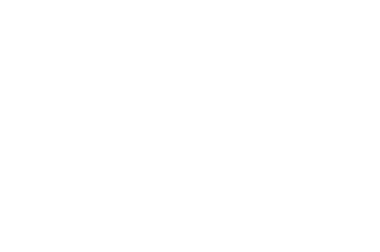

In [4]:
resized = img[:x_size-x_remainder, :y_size-y_remainder, :]
del img
resized_x_size = resized.shape[0]
resized_y_size = resized.shape[1]
del resized

#print(resized.shape)
blank_update = np.ones([resized_x_size, resized_y_size,3])
blank_update *= np.array([256,256,0])
plt.axis("off")

num_x_samples = int(resized_x_size/256)
num_y_samples = int(resized_y_size/256)
print(num_x_samples, num_y_samples)

for row in range(num_y_samples):
    
    y_low = row*y_window
    y_high = (row+1)*y_window
    
    for sample_in_row in range(num_x_samples):
        x_low = sample_in_row*x_window
        x_high = (sample_in_row+1)*x_window
        print(x_low, x_high)
        #sample = resized[x_low:x_high,y_low:y_high,:]
        
        _name = "x" + str(x_low) + str(x_high) + "y" + str(y_low) + str(y_high) + ".png"
        sample = scipy.misc.imread(_name)
        
        #scipy.misc.imsave(name=_name,arr=sample)
        blank_update[x_low:x_high,y_low:y_high,:] = sample
        sample = scipy.misc.imresize(sample,[resized_x_size, resized_y_size,3])
        plot_image = np.concatenate((blank_update, sample), axis=1)
        #imgplot = plt.imshow(plot_image)
        #plt.show()
        scipy.misc.imshow(plot_image)
        # send sample to classifier